# Lab 1 key

**Author**: Sarah Wesolowski [scwesolowski@salisbury.edu]

**Date**: September 10th, 2020

**Purpose**: A notebook that contains solutions to Math 465 lab 1.

## Problem 1(a)

If you run a 10 kilometer race in 43 minutes 30 seconds, what is your average time per mile? What is your average speed in miles per hour? (Hint: there are 1.61 kilometers in a mile).

In [1]:
race_length = 10.
seconds_to_minutes = 1/60.
time = 43. + 30*seconds_to_minutes

km_to_miles = 1./1.61

race_length_miles = race_length * km_to_miles
print('Race length in miles is', race_length_miles)
print('Race time in minutes is', time)

time_per_mile = time / race_length_miles

print('Time per mile is', time_per_mile)

Race length in miles is 6.211180124223602
Race time in minutes is 43.5
Time per mile is 7.003500000000001


## Problem 1(b)

The volume of a sphere with radius $r$ is $\frac34 \pi r^3$ . What is the volume of a sphere with
radius 5?

In [2]:
from math import pi

In [3]:
radius = 5.
volume = 3./4. * pi * pow(radius, 3)
print('The volume of the sphere is', volume)

The volume of the sphere is 294.5243112740431


## Problem 1(c)

Suppose the cover price of a book is \\$ 24.95, 
but bookstores get a 40\% discount. Shipping costs \$3 for the first copy and 75 cents for each additional copy. What is the total wholesale cost for 60 copies?


In [4]:
cover_price = 24.95
bookstore_price = cover_price * 0.6

first_copy_cost = 3.
all_other_copies_cost = 0.75

total_cost = bookstore_price +first_copy_cost\
            + 59. * (bookstore_price+all_other_copies_cost)

print('The bookstore pays a total of $', total_cost)

The bookstore pays a total of $ 945.4499999999999


## Problem 1(d)

If I leave my house at 6:52 am and run 1 mile at an easy pace (8:15 per mile), then 3 miles at tempo (7:12 per mile) and 1 mile at easy pace again, what time do I get home for breakfast?

In [5]:
easy_pace = 8 + seconds_to_minutes*15
tempo_pace = 7 + seconds_to_minutes*12
minutes_in_hour = 60

hours_counter = 6
minutes_counter = 52

time_to_run_in_minutes = 2*easy_pace + 3*tempo_pace
print('Takes', time_to_run_in_minutes, 'minutes total to run')

time_left_in_run = time_to_run_in_minutes
while time_left_in_run > 1:
    time_left_in_run -= 1 # subtract 1 minute from time left
    minutes_counter += 1
    if minutes_counter == 60:
        # reset minutes counter
        minutes_counter = 0
        # increment hours counter
        hours_counter += 1
        
print('Gets home at', hours_counter, minutes_counter)

Takes 38.1 minutes total to run
Gets home at 7 30


## Problem 2

### Load the data from the file

In [6]:
import numpy as np

In [9]:
contents_pr_2 =np.load('lab1_file2.npz')

In [10]:
# see what's in the file
contents_pr_2.files

['xvals', 'data']

In [11]:
# store file contents in sensible arrays
x_vals_pr_2 = contents_pr_2['xvals']
y_vals_pr_2 = contents_pr_2['data']

### Plot data to see what it looks like

In [12]:
import matplotlib.pyplot as plt

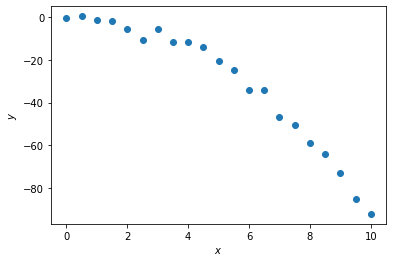

In [15]:
# make a preliminary plot of the data to see what it looks like
plt.plot(x_vals_pr_2, y_vals_pr_2, 'o', label='Data');
plt.xlabel(r'$x$');
plt.ylabel(r'$y$');

This data doesn't look very linear, it looks like it has a substantial amount of curvature. Anyway, let's use the given slope and intercept to make a linear model prediction

$$ y = -9.903 x + 14.681 $$

### Make predictions with a linear model

In [17]:
m_pr_2 = -9.903
b_pr_2 = 14.681
nx_pr_2 = len(x_vals_pr_2)
y_pred_pr_2 = np.empty(nx_pr_2)

In [18]:
for i in range(0, nx_pr_2):
    y_pred_pr_2[i] = m_pr_2 * x_vals_pr_2[i] + b_pr_2

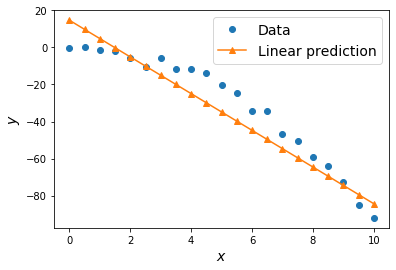

In [19]:
plt.plot(x_vals_pr_2, y_vals_pr_2, 'o', label='Data');
plt.plot(x_vals_pr_2, y_pred_pr_2, '^-', label='Linear prediction');
plt.xlabel(r'$x$', fontsize=14);
plt.ylabel(r'$y$', fontsize=14);
plt.legend(fontsize=14);

The linear model doesn't really look like it captures all aspects of the data. Something like a quadratic model would probably be better. If this is supposed to be an explanatory model, it is probably not a good one or doesn't capture all aspects of the phenomenon.

### Compute and plot errors

In [20]:
abs_err_pr_2 = np.empty(nx_pr_2)
perc_err_pr_2 = np.empty(nx_pr_2)

for i in range(0, nx_pr_2):
    abs_err_pr_2[i] = abs((y_vals_pr_2[i]-y_pred_pr_2[i]))
    perc_err_pr_2[i] = abs(abs_err_pr_2[i]/y_vals_pr_2[i]) * 100.0

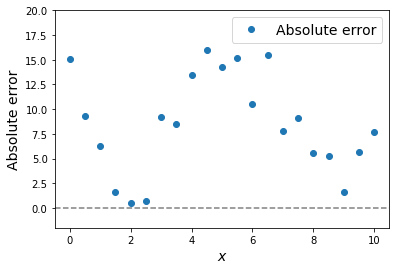

In [23]:
plt.plot(x_vals_pr_2, abs_err_pr_2, 'o', label='Absolute error');
plt.xlabel(r'$x$', fontsize=14);
plt.ylabel('Absolute error', fontsize=14);
plt.axhline(0, color='gray', linestyle='--')
plt.ylim([-2,20])
plt.legend(fontsize=14);

The absolute error is larger on the ends and in the middle and gets small where the prediction line crosses the curve of the data

Relative and percent error will look the same on different scales, so I just plot percent error here

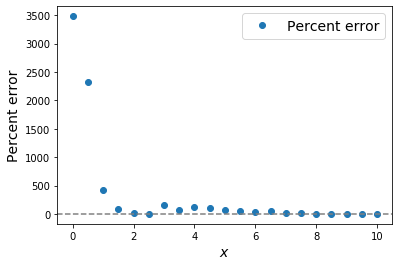

In [25]:
plt.plot(x_vals_pr_2, perc_err_pr_2, 'o', label='Percent error');
plt.xlabel(r'$x$', fontsize=14);
plt.ylabel('Percent error', fontsize=14);
plt.axhline(0, color='gray', linestyle='--')
#plt.ylim([-2,20])
plt.legend(fontsize=14);

The percent error is very large at small x due to the large change in scale of the y values over the domain. The percent error then becomes very small at larger x values

## Problem 3

In [26]:
masses = np.array([50,100,150,200,250,300,350,400,450,500,550])
elongations = np.array([1.000, 1.875, 2.750, 3.250, 4.375, 4.875, 5.675, 6.500, 7.250, 8.000, 8.750])
n_masses = len(masses)

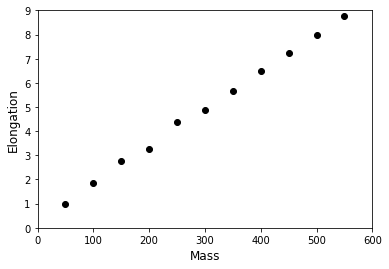

In [35]:
plt.plot(masses, elongations, 'o', color='black');
plt.xlabel('Mass', fontsize=12);
plt.ylabel('Elongation', fontsize=12);
plt.ylim([0,9]);
plt.xlim([0,600]);

In [30]:
spring_const = (elongations[5]-elongations[3])/(masses[5]-masses[3])
print('spring constant is', spring_const)

spring constant is 0.01625


In [31]:
elong_prediction = np.empty(n_masses)
for i in range(0,n_masses):
    elong_prediction[i] = spring_const * masses[i]

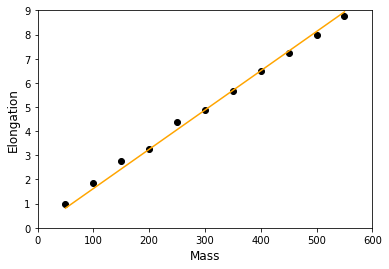

In [34]:
plt.plot(masses, elongations, 'o', color='black');
plt.plot(masses, elong_prediction, '-', color='orange');
plt.xlabel('Mass', fontsize=12);
plt.ylabel('Elongation', fontsize=12);
plt.ylim([0,9]);
plt.xlim([0,600]);

## Problem 4 (Bonus challenge)

In [36]:
from scipy import stats

In [37]:
npts_4 = 10

In [46]:
np.random.seed(12345678) # use any integer argument to seed the generator
xvals_4 = np.random.random(npts_4)
yvals_4 = -2.4*xvals_4 -1.3 + np.random.random(npts_4)

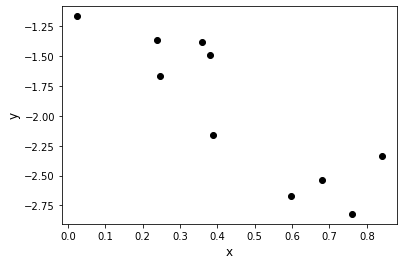

In [47]:
plt.plot(xvals_4, yvals_4, 'o');
plt.xlabel('x', fontsize=12);
plt.ylabel('y', fontsize=12);

In [48]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xvals_4, yvals_4)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -2.055136    intercept: -1.031422


The true slope is -2.4 and the true intercept is -1.3, so the results aren't too far off. The slope isn't steep enough and the intercept is too positive.

In [49]:
yvals_pred_4 = np.empty(npts_4)
for i in range(0,npts_4):
    yvals_pred_4[i] = slope * xvals_4[i] + intercept

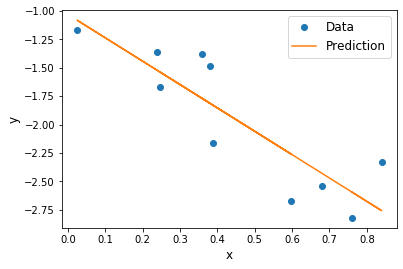

In [50]:
plt.plot(xvals_4, yvals_4, 'o', label='Data');
plt.plot(xvals_4, yvals_pred_4, '-', label='Prediction');
plt.xlabel('x', fontsize=12);
plt.ylabel('y', fontsize=12);
plt.legend(fontsize=12);

The linear regression result does a good job of capturing the original line used to generate the data.

In [51]:
perc_err_4 = np.empty(npts_4)
for i in range(0, npts_4):
    perc_err_4[i] = abs((yvals_4[i] - yvals_pred_4[i])/yvals_4[i])

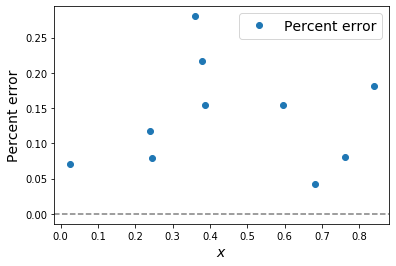

In [52]:
plt.plot(xvals_4, perc_err_4, 'o', label='Percent error');
plt.xlabel(r'$x$', fontsize=14);
plt.ylabel('Percent error', fontsize=14);
plt.axhline(0, color='gray', linestyle='--')
#plt.ylim([-2,20])
plt.legend(fontsize=14);

The error is fairly random and doesn't seem to show any real patterns